# Agregación y agrupación

Una pieza esencial en el análisis de grandes datos es un resumen eficiente: calcular agregaciones como ``sum()``, ``mean()``, ``median()``, ``min()``, y ``max()``, en las que un único número da una idea de la naturaleza de un conjunto de datos potencialmente grande.
En esta sección, exploraremos las agregaciones en Pandas, desde operaciones simples similares a las que hemos visto en los arrays de NumPy, hasta operaciones más sofisticadas basadas en el concepto de ``groupby``.

Por comodidad, utilizaremos la misma función mágica ``display`` que hemos visto en secciones anteriores:

In [5]:
import numpy as np
import pandas as pd

class display(object):
    """Mostrar la representación HTML de varios objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Datos de Planetas

Aquí usaremos el conjunto de datos Planetas, disponible a través del [paquete Seaborn](http://seaborn.pydata.org/) (ver [Visualization With Seaborn](14_Visualization-With-Seaborn.ipynb)).
Proporciona información sobre planetas que los astrónomos han descubierto alrededor de otras estrellas (conocidos como *planetas extrasolares* o *exoplanetas* para abreviar). Puede descargarse con un simple comando Seaborn:

In [6]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [7]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [8]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Contiene algunos detalles sobre los más de 1.000 planetas extrasolares descubiertos hasta 2014.

## Agregación simple en Pandas

Anteriormente, hemos explorado algunas de las agregaciones de datos disponibles para arrays NumPy (["Agregaciones: Mín, Máx, y todo lo que hay en medio"](4_Computation-on-arrays-aggregates.ipynb)).
Al igual que con un array unidimensional NumPy, para una ``Serie`` Pandas los agregados devuelven un único valor:

In [9]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [10]:
ser.sum()

2.811925491708157

In [11]:
ser.mean() # Sale una media para A y otra media para B, ya que Pandas trabaja por columnas a no ser que se le indique lo contrario.
# Si quisieramos hacerlo por filas:
# df.mean(axis='columns')
# (Sí, está como al revés)

0.5623850983416314

Para un ``DataFrame``, por defecto los agregados devuelven resultados dentro de cada columna:

In [12]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [13]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

Especificando el argumento ``axis``, puede agregar dentro de cada fila:

In [14]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Las ``Series`` y ``DataFrame`` de Pandas incluyen todos los agregados comunes mencionados en [Aggregations: Min, Max, and Everything In Between](4_Computation-on-arrays-aggregates.ipynb); además, hay un método de conveniencia ``describe()`` que calcula varios agregados comunes para cada columna y devuelve el resultado.
Usemos esto en los datos de Planetas, por ahora eliminando las filas con valores perdidos:

In [15]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Esta puede ser una forma útil de empezar a comprender las propiedades generales de un conjunto de datos.
Por ejemplo, en la columna ``year`` vemos que, aunque ya en 1989 se descubrieron exoplanetas, la mitad de los conocidos no se descubrieron hasta 2010 o después.
Esto se debe en gran parte a la misión *Kepler*, un telescopio espacial diseñado específicamente para encontrar planetas eclipsantes alrededor de otras estrellas.

La siguiente tabla resume algunas otras agregaciones incorporadas en Pandas:

| Agregacion               | Descripcion                     |
|--------------------------|---------------------------------|
| ``count()``              | Número total de artículos       |
| ``first()``, ``last()``  | Primer y último punto           |
| ``mean()``, ``median()`` | Media y mediana                 |
| ``min()``, ``max()``     | Mínimo y máximo                 |
| ``std()``, ``var()``     | Desviación estandar y varianza  |
| ``mad()``                | Desviación media absoluta       |
| ``prod()``               | Producto de todos los artículos |
| ``sum()``                | Suma de todas las partidas      |

Todos estos son métodos de los objetos ``DataFrame`` y ``Series``.

Sin embargo, para profundizar en los datos, los agregados simples no suelen ser suficientes.
El siguiente nivel de integración de datos es la operación ``groupby``, que permite calcular rápida y eficazmente agregados sobre subconjuntos de datos.

## GroupBy: Dividir, Aplicar, Combinar

Las agregaciones simples pueden darle una idea de su conjunto de datos, pero a menudo preferiríamos agregar condicionalmente en alguna etiqueta o índice: esto se implementa en la llamada operación ``groupby``.
El nombre "group by" procede de un comando del lenguaje de bases de datos SQL, pero quizá sea más ilustrativo pensar en él en los términos acuñados por Hadley Wickham, famoso por Rstats: *dividir, aplicar, combinar*.

### Split, apply, combine

Un ejemplo canónico de esta operación dividir-aplicar-combinar, donde el "aplicar" es una agregación sumatoria.

Esto aclara lo que consigue el ``groupby``:

- El paso *split* consiste en dividir y agrupar un ``DataFrame`` en función del valor de la clave especificada.
- El paso *apply* implica calcular alguna función, normalmente un agregado, transformación o filtrado, dentro de los grupos individuales.
- El paso *combinar* combina los resultados de estas operaciones en una matriz de salida.

Aunque esto podría hacerse manualmente utilizando alguna combinación de los comandos de enmascaramiento, agregación y fusión descritos anteriormente, es importante tener en cuenta que *las divisiones intermedias no necesitan instanciarse explícitamente*. En su lugar, ``GroupBy`` puede (a menudo) hacer esto en una sola pasada sobre los datos, actualizando la suma, media, recuento, min, u otro agregado para cada grupo a lo largo del camino.
El poder del ``GroupBy`` es que abstrae estos pasos: el usuario no necesita pensar en *cómo* se realiza el cálculo bajo el capó, sino que piensa en la *operación en su conjunto*.

Como ejemplo concreto, echemos un vistazo al uso de Pandas para el cálculo mostrado en este diagrama.
Empezaremos creando el ``DataFrame`` de entrada:

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame({'department': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'VV': range(6)})
df

,department,VV
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


La operación más básica de dividir-aplicar-combinar puede calcularse con el método ``groupby()`` de ``DataFrame``s, pasando el nombre de la columna clave deseada:

In [18]:
df.groupby('department')

Observa que lo que se devuelve no es un conjunto de ``DataFrame``s, sino un objeto ``DataFrameGroupBy``.
Este objeto es donde está la magia: se puede pensar en él como una vista especial del ``DataFrame``, que está preparado para profundizar en los grupos, pero no hace ningún cálculo real hasta que se aplica la agregación.
Este enfoque de "evaluación perezosa" significa que los agregados comunes pueden implementarse muy eficientemente de un modo casi transparente para el usuario.

Para producir un resultado, podemos aplicar un agregado a este objeto ``DataFrameGroupBy``, que realizará los pasos apropiados de aplicar/combinar para producir el resultado deseado:

In [19]:
df_grouped = df.groupby('department', as_index=False).sum()
df_grouped

,department,VV
0,A,3
1,B,5
2,C,7


El método ``sum()`` es sólo una posibilidad aquí; puedes aplicar virtualmente cualquier función de agregación común de Pandas o NumPy, así como virtualmente cualquier operación válida de ``DataFrame``, como veremos en la siguiente discusión.

In [20]:
df_grouped = df.groupby('department', as_index=False).max()
df_grouped

,department,VV
0,A,3
1,B,4
2,C,5


> (Pandas no tiene método para calcular la moda)

### El objeto GroupBy

El objeto ``GroupBy`` es una abstracción muy flexible.
En muchos sentidos, puedes simplemente tratarlo como si fuera una colección de ``DataFrame``s, y hace las cosas difíciles bajo el capó. Veamos algunos ejemplos utilizando los datos de Los Planetas.

Quizás las operaciones más importantes disponibles en un ``GroupBy`` son *agregar*, *filtrar*, *transformar* y *aplicar*.

#### Indexación de columnas

El objeto ``GroupBy`` soporta la indexación por columnas de la misma forma que el ``DataFrame``, y devuelve un objeto ``GroupBy`` modificado.
Por ejemplo

In [21]:
planets.groupby('method')

In [22]:
planets.groupby('method')['orbital_period']

Aquí hemos seleccionado un grupo ``Series`` particular del grupo original ``DataFrame`` por referencia a su nombre de columna.

Al igual que con el objeto ``GroupBy``, no se realiza ningún cálculo hasta que llamamos a algún agregado en el objeto:

In [23]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [24]:
len(planets['method'].unique())

10

In [25]:
planets.groupby('method', as_index=False)[['orbital_period']].mean()

,method,orbital_period
0,Astrometry,631.180000
1,Eclipse Timing Variations,4751.644444
2,Imaging,118247.737500
3,Microlensing,3153.571429
4,Orbital Brightness Modulation,0.709307
5,Pulsar Timing,7343.021201
6,Pulsation Timing Variations,1170.000000
7,Radial Velocity,823.354680
8,Transit,21.102073
9,Transit Timing Variations,79.783500


In [26]:
# planets[planets['method']=='Astrometry'][['orbital_period']].mean()

Esto da una idea de la escala general de periodos orbitales (en días) a la que es sensible cada método.

#### Iteración sobre grupos

El objeto ``GroupBy`` permite la iteración directa sobre los grupos, devolviendo cada grupo como una ``Series`` o ``DataFrame``:

In [27]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


> Explicación del {0:30s} y {1} está en los últimos 5 minutos de la clase del día 3/11/2023.

Esto puede ser útil para hacer ciertas cosas manualmente, aunque a menudo es mucho más rápido utilizar la funcionalidad incorporada ``apply``, que discutiremos momentáneamente.

#### Métodos de envío

A través de la magia de las clases de Python, cualquier método no implementado explícitamente por el objeto ``GroupBy`` será pasado y llamado en los grupos, ya sean objetos ``DataFrame`` o ``Series``.
Por ejemplo, puedes utilizar el método ``describe()`` de ``DataFrame`` para realizar un conjunto de agregaciones que describan cada grupo en los datos:

In [28]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

Observar esta tabla nos ayuda a entender mejor los datos: por ejemplo, la gran mayoría de los planetas se han descubierto por los métodos de Velocidad Radial y Tránsito, aunque este último no se hizo común (debido a nuevos telescopios más precisos) hasta la última década.
Los métodos más recientes parecen ser el de la Variación Temporal del Tránsito y el de la Modulación del Brillo Orbital, que no se utilizaron para descubrir un nuevo planeta hasta 2011.

Este es solo un ejemplo de la utilidad de los métodos de envío.
Fíjate en que se aplican *a cada grupo individual*, y los resultados se combinan dentro de ``GroupBy`` y se devuelven.
De nuevo, cualquier método válido de ``DataFrame`` o ``Series`` puede utilizarse en el objeto ``GroupBy`` correspondiente, lo que permite realizar operaciones muy flexibles y potentes.

### Agregar, filtrar, transformar, aplicar

La discusión anterior se centró en la agregación para la operación combinar, pero hay más opciones disponibles.
En particular, los objetos ``GroupBy`` tienen métodos ``aggregate()``, ``filter()``, ``transform()``, y ``apply()`` que implementan eficientemente una variedad de operaciones útiles antes de combinar los datos agrupados.

Para el propósito de las siguientes subsecciones, utilizaremos este ``DataFrame``:

In [29]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Agregación

Ahora estamos familiarizados con las agregaciones ``GroupBy`` con ``sum()``, ``median()``, y similares, pero el método ``aggregate()`` permite aún más flexibilidad.
Puede tomar una cadena, una función o una lista de ellas y calcular todos los agregados a la vez.
He aquí un ejemplo rápido que combina todos estos métodos:

> El aggregate es un método de groupby.

In [30]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [31]:
# También se puede utilizar funciones que no sean de pandas, por ejemplo una de numpy, o cualquier otra que hayamos hecho nosotros:

df.groupby('key').aggregate(['min', 'median', 'max', np.mean, sum]) #np.mean es de numpy, sum es de python

/var/folders/8g/kffz_9_51g3dtjypj26t8cmc0000gn/T/ipykernel_1207/2120065972.py:3: FutureWarning: The provided callable <function mean at 0x11147b060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('key').aggregate(['min', 'median', 'max', np.mean, sum]) #np.mean es de numpy, sum es de python
/var/folders/8g/kffz_9_51g3dtjypj26t8cmc0000gn/T/ipykernel_1207/2120065972.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('key').aggregate(['min', 'median', 'max', np.mean, sum]) #np.mean es de numpy, sum es de python


data1                     data2                    
      min median max mean sum   min median max mean sum
key                                                    
A       0    1.5   3  1.5   3     3    4.0   5  4.0   8
B       1    2.5   4  2.5   5     0    3.5   7  3.5   7
C       2    3.5   5  3.5   7     3    6.0   9  6.0  12

> Le estamos aplicando cada agregación que hayamos puesto a CADA columna. En este caso, data1 y data2.

Otro patrón útil es pasar un diccionario que asigne los nombres de las columnas a las operaciones que deben aplicarse a esa columna:

In [32]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [ ]:
# Si queremos hacerle otra agregación distinta a una de las columnas:

df.groupby('key').aggregate({'data1': ['min', 'mean'],
                             'data2': 'max'})

In [33]:
# Sacar solo los valores numéricos y, de ellos, la media:

df.describe().loc['mean',:]

data1    2.5
data2    4.5
Name: mean, dtype: float64

#### Filtrado

Una operación de filtrado permite descartar datos en función de las propiedades del grupo.
Por ejemplo, podríamos querer mantener todos los grupos en los que la desviación estándar es mayor que algún valor crítico:

In [34]:
def filter_func(x):
    return x['data2'].min() > 1 # Esto lo que devuelve es un True/False.

In [35]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [36]:
filter_func(df)

False

In [37]:
display('df', "df.groupby('key').min()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').min()
     data1  data2
key              
A        0      3
B        1      0
C        2      3

df.groupby('key').filter(filter_func)
  key  data1  data2
0   A      0      5
2   C      2      3
3   A      3      3
5   C      5      9

> Filtra por data 2 según la condición que le hemos puesto en la función. La fila 4, donde data2 es 7, no lo muestra porque está agregado. (investigar esto)

In [38]:
df[df['data2'] > 1]

,key,data1,data2
0,A,0,5
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [39]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


La función de filtrado debe devolver un valor booleano que especifique si el grupo pasa el filtrado. En este caso, como el grupo A no tiene una desviación típica superior a 4, se elimina del resultado.

#### Transformación

Mientras que la agregación debe devolver una versión reducida de los datos, la transformación puede devolver alguna versión transformada de los datos completos para recombinar.
Para tal transformación, la salida tiene la misma forma que la entrada.
Un ejemplo común es centrar los datos restando la media del grupo:

In [40]:
df.groupby('key').transform(lambda x: x - x.mean()) # Clase día 6 noviembre a las 19:15.

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [42]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [44]:
df.drop(columns='key').mean()

data1    2.5
data2    4.5
dtype: float64

<Axes: >

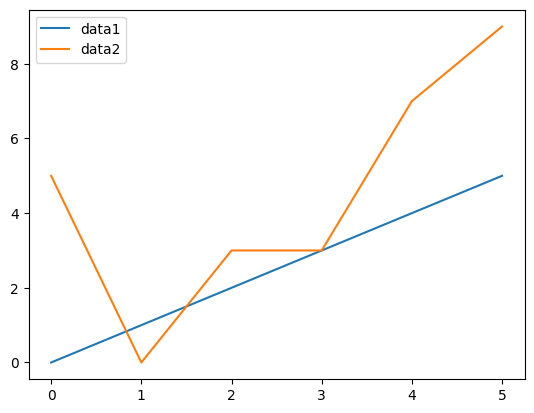

In [41]:
df.plot() #Data2 es data1 normalizado(??)

In [45]:
df['data1_transformed'] = df['data1'] - df['data1'].mean()
df

,key,data1,data2,data1_transformed
0,A,0,5,-2.5
1,B,1,0,-1.5
2,C,2,3,-0.5
3,A,3,3,0.5
4,B,4,7,1.5
5,C,5,9,2.5


#### El método apply()

El método ``apply()`` permite aplicar una función arbitraria a los resultados del grupo.
La función debe tomar un ``DataFrame``, y devolver un objeto Pandas (por ejemplo, ``DataFrame``, ``Series``) o un escalar; la operación de combinación se adaptará al tipo de salida devuelta.

Por ejemplo, aquí hay una ``apply()`` que normaliza la primera columna por la suma de la segunda:

In [46]:
def norm_by_data2(x):
    # x es un DataFrame de valores de grupo
    # x['data1'] = x['data1'] / x['data2'].sum()
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

df
  key  data1  data2  data1_transformed
0   A      0      5               -2.5
1   B      1      0               -1.5
2   C      2      3               -0.5
3   A      3      3                0.5
4   B      4      7                1.5
5   C      5      9                2.5

df.groupby('key').apply(norm_by_data2)
      key     data1  data2  data1_transformed
key                                          
A   0   A  0.000000      5               -2.5
    3   A  0.375000      3                0.5
B   1   B  0.142857      0               -1.5
    4   B  0.571429      7                1.5
C   2   C  0.166667      3               -0.5
    5   C  0.416667      9                2.5

In [47]:
df.groupby('key').sum()

,data1,data2,data1_transformed
key,,,
A,3,8,-2.0
B,5,7,0.0
C,7,12,2.0


In [48]:
print(3/8)

0.375


La función ``apply()`` dentro de un ``GroupBy`` es bastante flexible: el único criterio es que la función toma un ``DataFrame`` y devuelve un objeto Pandas o un escalar; ¡lo que hagas en medio depende de ti!

### Especificar la clave de división

En los ejemplos sencillos presentados anteriormente, dividimos el ``DataFrame`` en un único nombre de columna.
Esta es sólo una de las muchas opciones por las que los grupos se pueden definir, y vamos a ir a través de algunas otras opciones para la especificación de grupo aquí.

#### Una lista, matriz, serie o índice que proporcione las claves de agrupación.

La clave puede ser cualquier serie o lista cuya longitud coincida con la del ``DataFrame``. Por ejemplo:

In [49]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

,key,data1,data2,data1_transformed
0,A,0,5,-2.5
1,B,1,0,-1.5
2,C,2,3,-0.5
3,A,3,3,0.5
4,B,4,7,1.5
5,C,5,9,2.5
,key,data1,data2,data1_transformed
0,ACC,7,17,-0.5
1,BA,4,3,-1.0
2,B,4,7,1.5


Por supuesto, esto significa que hay otra forma más verbosa de realizar el ``df.groupby('clave')`` de antes:

In [50]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2  data1_transformed
0   A      0      5               -2.5
1   B      1      0               -1.5
2   C      2      3               -0.5
3   A      3      3                0.5
4   B      4      7                1.5
5   C      5      9                2.5

df.groupby(df['key']).sum()
     data1  data2  data1_transformed
key                                 
A        3      8               -2.0
B        5      7                0.0
C        7     12                2.0

#### Un diccionario o serie que asigna un índice a un grupo

Otro método consiste en proporcionar un diccionario que asigne los valores del índice a las claves del grupo:

In [51]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2,data1_transformed
key,,,
A,0,5,-2.5
B,1,0,-1.5
C,2,3,-0.5
A,3,3,0.5
B,4,7,1.5
C,5,9,2.5
,data1,data2,data1_transformed
key,,,
consonant,12,19,2.0


#### Cualquier función Python

De forma similar al mapeo, puede pasar cualquier función de Python que introduzca el valor del índice y genere el grupo:

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

#### Una lista de claves válidas

Además, cualquiera de las opciones de clave anteriores puede combinarse para agruparse en un multiíndice:

In [ ]:
df2.groupby([str.lower, mapping]).mean()

### Ejemplo de agrupación

Como ejemplo de esto, en un par de líneas de código Python podemos juntar todo esto y contar los planetas descubiertos por método y por década:

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

Esto demuestra el poder de la combinación de muchas de las operaciones que hemos discutido hasta ahora cuando se observan conjuntos de datos realistas.
Inmediatamente obtenemos una comprensión general de cuándo y cómo se han descubierto planetas en las últimas décadas.

Aquí sugeriría profundizar en estas pocas líneas de código, y evaluar los pasos individuales para asegurarse de que entiende exactamente lo que están haciendo al resultado.
Ciertamente es un ejemplo algo complicado, pero entender estas piezas te dará los medios para explorar de forma similar tus propios datos.